In [238]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotnine
import seaborn as sns
from plotnine import ggplot , geom_jitter , aes ,theme_light, geom_point
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics


from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE

from statistics import mean,stdev

from sklearn.preprocessing import StandardScaler

import missingno as msno

# run block of code and catch warnings
import warnings
warnings.filterwarnings("ignore")
from copy import deepcopy

In [4]:
!unzip '/content/drive/MyDrive/Kaggle/self-built-masked-face-recognition-dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: self-built-masked-face-recognition-dataset/AFDB_face_dataset/zhouhuimin/1_0_zhouhuimin_0008.jpg  
  inflating: self-built-masked-face-recognition-dataset/AFDB_face_dataset/zhouhuimin/1_0_zhouhuimin_0009.jpg  
  inflating: self-built-masked-face-recognition-dataset/AFDB_face_dataset/zhouhuimin/1_0_zhouhuimin_0010.jpg  
  inflating: self-built-masked-face-recognition-dataset/AFDB_face_dataset/zhouhuimin/1_0_zhouhuimin_0011.jpg  
  inflating: self-built-masked-face-recognition-dataset/AFDB_face_dataset/zhouhuimin/1_0_zhouhuimin_0012.jpg  
  inflating: self-built-masked-face-recognition-dataset/AFDB_face_dataset/zhouhuimin/1_0_zhouhuimin_0013.jpg  
  inflating: self-built-masked-face-recognition-dataset/AFDB_face_dataset/zhouhuimin/1_0_zhouhuimin_0014.jpg  
  inflating: self-built-masked-face-recognition-dataset/AFDB_face_dataset/zhouhuimin/1_0_zhouhuimin_0015.jpg  
  inflating: self-built-masked-face-recognition-dataset/AFDB_

In [239]:
path = '/content/self-built-masked-face-recognition-dataset'

In [240]:
IMG_DIR_list = os.listdir(path)

In [241]:
IMG_DIR_list = IMG_DIR_list[1:]

In [242]:
IMG_DIR_list

['AFDB_masked_face_dataset', 'AFDB_face_dataset']

1 for masked and 0 for non masked

In [243]:
dir_url = os.path.join(path, IMG_DIR_list[0])
dir_url

'/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset'

In [244]:
img_file_urls_1 = []
for subdir in sorted(os.listdir(dir_url)):
  for file in (os.listdir(os.path.join(dir_url, subdir))):
    img_file_urls_1.append(os.path.join(os.path.join(dir_url, subdir), file))

In [245]:
len(img_file_urls_1)

2203

In [246]:
img_file_urls_1

['/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset/aidai/0_0_1.jpg',
 '/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset/aidai/0_0_0.jpg',
 '/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset/anhu/0_0_5.jpg',
 '/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset/aoziyi/0_0_+·+в 2020-02-24 225427.png',
 '/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset/aoziyi/0_0_+·+в 2020-02-24 225352.png',
 '/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset/aoziyi/0_0_+·+в 2020-02-24 225329.png',
 '/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset/aoziyi/0_0_+·+в 2020-02-24 225408.png',
 '/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset/axin/0_0_0.jpg',
 '/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset/baijingting/0_0_9.jpg',
 '/content/self-built-masked-face-r

In [247]:
# img_file_urls_1 = []
# for root,d_names,f_names in os.walk(path):
#   for f in f_names:
#     img_file_urls_1.append(os.path.join(root, f))

# print("img_file_urls_1 = %s" %img_file_urls_1)

In [248]:
# print(dir_url)

In [249]:
# img_file_urls_1 = img_file_urls_1[1:]
# img_file_urls_1

In [250]:
import random
random.shuffle(img_file_urls_1)

In [251]:
import cv2
from PIL import Image
image_array_list_1 = []
for img_url in img_file_urls_1:
  img_array = cv2.imread(img_url, cv2.IMREAD_GRAYSCALE)
  img_pil = Image.fromarray(img_array)
  img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))
  img_array = (img_28x28.flatten())
  img_array  = img_array.reshape(-1,1).T
  image_array_list_1.append(img_array.tolist()[0])

In [252]:
image_array_list_1 = np.array(image_array_list_1)

In [253]:
df_1 = pd.DataFrame(image_array_list_1)

In [254]:
df_1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,10,13,18,23,20,9,5,9,12,6,8,31,20,14,15,7,6,6,5,25,18,5,5,4,5,6,8,11,14,16,22,28,29,11,7,10,12,9,10,43,...,206,198,200,198,186,172,161,172,168,123,74,73,15,14,24,38,45,113,151,167,196,188,183,194,201,191,200,198,195,200,196,184,171,166,172,164,106,69,90,98
1,69,79,63,48,41,34,27,26,25,25,22,18,18,20,18,18,20,16,18,19,15,20,20,23,22,23,28,41,111,87,70,63,52,52,45,40,42,41,38,32,...,115,120,116,93,49,36,20,20,31,43,87,229,103,97,103,121,121,104,108,106,109,114,111,113,97,87,100,109,110,99,62,31,25,16,24,26,37,46,61,204
2,9,14,26,46,49,52,98,137,159,167,171,175,179,182,185,187,188,185,183,182,178,170,158,123,71,49,47,35,13,21,39,53,61,107,141,157,167,173,176,180,...,182,194,198,191,176,135,23,0,18,84,110,114,19,7,0,6,65,67,86,81,78,109,138,145,150,133,140,174,181,171,157,142,135,104,13,6,1,8,66,96
3,116,115,72,75,84,76,78,76,76,87,79,73,54,52,51,57,59,55,49,57,101,118,67,49,52,54,54,51,64,68,63,90,84,80,75,73,71,48,56,72,...,40,49,85,121,141,151,155,155,153,153,149,145,171,170,179,182,187,194,118,29,35,36,36,35,35,37,37,40,60,94,121,142,160,164,164,165,166,165,160,149
4,82,65,53,47,46,37,25,19,15,15,28,38,41,54,69,60,50,36,24,19,15,19,27,22,28,163,191,40,73,57,54,47,25,17,16,22,50,93,130,147,...,49,49,51,51,54,54,53,51,50,42,99,125,73,191,175,161,157,156,160,166,169,161,159,97,30,48,48,50,49,49,52,51,53,52,49,46,47,55,68,71


Verification

In [255]:
import numpy as np
def convert_gray2rgb(image):
    width, height = image.shape
    out = np.empty((width, height, 3), dtype=np.uint8)
    out[:, :, 0] = image
    out[:, :, 1] = image
    out[:, :, 2] = image
    return out


gray = df_1.values[100].reshape(28,28)  # gray scale image
gray2rgb = convert_gray2rgb(gray)

In [256]:
gray.shape

(28, 28)

In [257]:
img = Image.fromarray(gray2rgb, 'RGB')
img.save('my1.png')
img.show()

Dataset for masked images

In [258]:
df_1.loc[:, 'target'] = 1
df_1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,target
0,10,13,18,23,20,9,5,9,12,6,8,31,20,14,15,7,6,6,5,25,18,5,5,4,5,6,8,11,14,16,22,28,29,11,7,10,12,9,10,43,...,198,200,198,186,172,161,172,168,123,74,73,15,14,24,38,45,113,151,167,196,188,183,194,201,191,200,198,195,200,196,184,171,166,172,164,106,69,90,98,1
1,69,79,63,48,41,34,27,26,25,25,22,18,18,20,18,18,20,16,18,19,15,20,20,23,22,23,28,41,111,87,70,63,52,52,45,40,42,41,38,32,...,120,116,93,49,36,20,20,31,43,87,229,103,97,103,121,121,104,108,106,109,114,111,113,97,87,100,109,110,99,62,31,25,16,24,26,37,46,61,204,1
2,9,14,26,46,49,52,98,137,159,167,171,175,179,182,185,187,188,185,183,182,178,170,158,123,71,49,47,35,13,21,39,53,61,107,141,157,167,173,176,180,...,194,198,191,176,135,23,0,18,84,110,114,19,7,0,6,65,67,86,81,78,109,138,145,150,133,140,174,181,171,157,142,135,104,13,6,1,8,66,96,1
3,116,115,72,75,84,76,78,76,76,87,79,73,54,52,51,57,59,55,49,57,101,118,67,49,52,54,54,51,64,68,63,90,84,80,75,73,71,48,56,72,...,49,85,121,141,151,155,155,153,153,149,145,171,170,179,182,187,194,118,29,35,36,36,35,35,37,37,40,60,94,121,142,160,164,164,165,166,165,160,149,1
4,82,65,53,47,46,37,25,19,15,15,28,38,41,54,69,60,50,36,24,19,15,19,27,22,28,163,191,40,73,57,54,47,25,17,16,22,50,93,130,147,...,49,51,51,54,54,53,51,50,42,99,125,73,191,175,161,157,156,160,166,169,161,159,97,30,48,48,50,49,49,52,51,53,52,49,46,47,55,68,71,1


for class 0 (non masked faces)

In [259]:
dir_url_0 = os.path.join(path, IMG_DIR_list[1])
dir_url_0

'/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset'

In [260]:
img_file_urls_0 = []
for subdir in sorted(os.listdir(dir_url_0)):
  for file in (os.listdir(os.path.join(dir_url_0, subdir))):
    img_file_urls_0.append(os.path.join(os.path.join(dir_url_0, subdir), file))

In [261]:
len(img_file_urls_0)

90468

In [262]:
img_file_urls_0

['/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset/aidai/1_0_aidai_0011.jpg',
 '/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset/aidai/1_0_aidai_0021.jpg',
 '/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset/aidai/0_0_aidai_0084.jpg',
 '/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset/aidai/1_0_aidai_0161.jpg',
 '/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset/aidai/1_0_aidai_0150.jpg',
 '/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset/aidai/1_0_aidai_0094.jpg',
 '/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset/aidai/1_0_aidai_0135.jpg',
 '/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset/aidai/1_0_aidai_0070.jpg',
 '/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset/aidai/1_0_aidai_0048.jpg',
 '/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset/aidai/1_0_aidai_0045.jpg',
 '/content

In [263]:
import random
random.shuffle(img_file_urls_0)

In [264]:
import cv2
from PIL import Image
image_array_list_0 = []
for img_url in img_file_urls_0[0:2203]:
  img_array = cv2.imread(img_url, cv2.IMREAD_GRAYSCALE)
  img_pil = Image.fromarray(img_array)
  img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))
  img_array = (img_28x28.flatten())
  img_array  = img_array.reshape(-1,1).T
  image_array_list_0.append(img_array.tolist()[0])

In [265]:
image_array_list_0 = np.array(image_array_list_0)

In [266]:
df_0 = pd.DataFrame(image_array_list_0)

In [267]:
df_0.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,22,14,15,28,13,14,23,12,9,24,29,34,39,32,26,30,28,25,25,25,24,17,18,15,17,22,41,51,19,21,21,9,5,20,22,9,18,25,25,30,...,73,66,65,62,57,67,75,172,209,119,110,115,105,139,175,114,123,125,116,99,79,69,69,69,69,68,65,64,64,60,53,50,58,72,78,172,239,209,155,153
1,57,51,52,57,60,45,48,54,53,60,68,72,79,87,105,109,113,154,154,140,135,144,159,178,187,187,184,166,53,44,46,54,58,55,56,62,70,77,85,89,...,170,199,213,212,189,123,148,171,109,73,65,72,237,150,68,71,63,64,52,46,35,35,61,70,115,164,178,184,187,194,193,159,142,117,137,141,78,61,72,76
2,12,19,24,21,33,44,21,12,10,20,25,30,23,20,8,2,4,7,23,32,44,66,62,89,57,20,11,3,12,16,25,12,18,21,12,9,23,32,14,33,...,176,189,201,203,200,205,200,178,152,88,70,116,89,89,89,89,88,89,93,60,43,80,122,159,168,178,184,189,196,202,214,213,207,198,185,153,96,51,105,126
3,82,121,96,58,47,40,43,62,66,59,73,101,82,39,51,55,53,57,54,53,56,56,60,43,35,53,52,36,66,78,124,105,58,44,40,41,56,65,75,85,...,204,190,179,174,169,163,151,136,131,129,130,136,218,218,219,217,212,209,177,184,238,253,241,233,231,227,217,204,182,169,155,149,147,138,125,113,118,125,131,132
4,10,13,12,10,10,4,3,5,8,14,16,8,5,6,8,9,7,7,13,11,3,6,12,15,18,13,11,12,12,10,9,6,4,22,47,61,66,80,87,68,...,202,222,235,236,238,195,70,126,230,222,210,141,142,137,119,102,59,124,178,146,111,85,68,62,59,57,82,156,214,230,234,231,159,59,91,202,232,207,173,86


Verification

In [268]:
import numpy as np
def convert_gray2rgb(image):
    width, height = image.shape
    out = np.empty((width, height, 3), dtype=np.uint8)
    out[:, :, 0] = image
    out[:, :, 1] = image
    out[:, :, 2] = image
    return out


gray = df_0.values[100].reshape(28,28)  # gray scale image
gray2rgb = convert_gray2rgb(gray)

In [269]:
gray.shape

(28, 28)

In [270]:
img = Image.fromarray(gray2rgb, 'RGB')
img.save('my0.png')
img.show()

Dataset for non masked images

In [271]:
df_0.loc[:, 'target'] = 0
df_0.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,target
0,22,14,15,28,13,14,23,12,9,24,29,34,39,32,26,30,28,25,25,25,24,17,18,15,17,22,41,51,19,21,21,9,5,20,22,9,18,25,25,30,...,66,65,62,57,67,75,172,209,119,110,115,105,139,175,114,123,125,116,99,79,69,69,69,69,68,65,64,64,60,53,50,58,72,78,172,239,209,155,153,0
1,57,51,52,57,60,45,48,54,53,60,68,72,79,87,105,109,113,154,154,140,135,144,159,178,187,187,184,166,53,44,46,54,58,55,56,62,70,77,85,89,...,199,213,212,189,123,148,171,109,73,65,72,237,150,68,71,63,64,52,46,35,35,61,70,115,164,178,184,187,194,193,159,142,117,137,141,78,61,72,76,0
2,12,19,24,21,33,44,21,12,10,20,25,30,23,20,8,2,4,7,23,32,44,66,62,89,57,20,11,3,12,16,25,12,18,21,12,9,23,32,14,33,...,189,201,203,200,205,200,178,152,88,70,116,89,89,89,89,88,89,93,60,43,80,122,159,168,178,184,189,196,202,214,213,207,198,185,153,96,51,105,126,0
3,82,121,96,58,47,40,43,62,66,59,73,101,82,39,51,55,53,57,54,53,56,56,60,43,35,53,52,36,66,78,124,105,58,44,40,41,56,65,75,85,...,190,179,174,169,163,151,136,131,129,130,136,218,218,219,217,212,209,177,184,238,253,241,233,231,227,217,204,182,169,155,149,147,138,125,113,118,125,131,132,0
4,10,13,12,10,10,4,3,5,8,14,16,8,5,6,8,9,7,7,13,11,3,6,12,15,18,13,11,12,12,10,9,6,4,22,47,61,66,80,87,68,...,222,235,236,238,195,70,126,230,222,210,141,142,137,119,102,59,124,178,146,111,85,68,62,59,57,82,156,214,230,234,231,159,59,91,202,232,207,173,86,0


In [272]:
frames = [df_1, df_0]
final_df = pd.concat(frames, ignore_index=True)

In [273]:
final_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,target
0,10,13,18,23,20,9,5,9,12,6,8,31,20,14,15,7,6,6,5,25,18,5,5,4,5,6,8,11,14,16,22,28,29,11,7,10,12,9,10,43,...,198,200,198,186,172,161,172,168,123,74,73,15,14,24,38,45,113,151,167,196,188,183,194,201,191,200,198,195,200,196,184,171,166,172,164,106,69,90,98,1
1,69,79,63,48,41,34,27,26,25,25,22,18,18,20,18,18,20,16,18,19,15,20,20,23,22,23,28,41,111,87,70,63,52,52,45,40,42,41,38,32,...,120,116,93,49,36,20,20,31,43,87,229,103,97,103,121,121,104,108,106,109,114,111,113,97,87,100,109,110,99,62,31,25,16,24,26,37,46,61,204,1
2,9,14,26,46,49,52,98,137,159,167,171,175,179,182,185,187,188,185,183,182,178,170,158,123,71,49,47,35,13,21,39,53,61,107,141,157,167,173,176,180,...,194,198,191,176,135,23,0,18,84,110,114,19,7,0,6,65,67,86,81,78,109,138,145,150,133,140,174,181,171,157,142,135,104,13,6,1,8,66,96,1
3,116,115,72,75,84,76,78,76,76,87,79,73,54,52,51,57,59,55,49,57,101,118,67,49,52,54,54,51,64,68,63,90,84,80,75,73,71,48,56,72,...,49,85,121,141,151,155,155,153,153,149,145,171,170,179,182,187,194,118,29,35,36,36,35,35,37,37,40,60,94,121,142,160,164,164,165,166,165,160,149,1
4,82,65,53,47,46,37,25,19,15,15,28,38,41,54,69,60,50,36,24,19,15,19,27,22,28,163,191,40,73,57,54,47,25,17,16,22,50,93,130,147,...,49,51,51,54,54,53,51,50,42,99,125,73,191,175,161,157,156,160,166,169,161,159,97,30,48,48,50,49,49,52,51,53,52,49,46,47,55,68,71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,56,58,53,64,66,67,74,69,52,48,46,44,58,66,78,85,82,76,77,88,94,97,102,108,105,106,111,112,66,55,61,67,69,64,67,72,73,67,62,62,...,10,15,28,41,45,39,30,47,91,127,138,176,166,155,140,125,112,112,113,119,147,157,154,150,135,94,44,16,18,24,33,43,43,38,30,52,98,127,138,0
4402,149,139,101,21,1,2,0,0,1,1,3,12,7,11,10,1,2,2,3,3,2,1,10,24,18,4,10,14,152,152,64,0,2,4,24,33,36,35,28,22,...,17,12,4,0,0,2,3,3,2,0,3,1,0,0,0,1,2,2,0,0,0,0,0,0,6,10,6,0,0,0,2,3,2,2,3,4,1,3,4,0
4403,134,146,143,89,92,130,82,32,13,6,14,59,127,160,141,118,116,99,80,57,35,27,25,21,18,14,15,17,144,158,116,117,150,69,18,8,11,34,94,156,...,183,165,148,122,102,87,75,79,76,48,24,37,38,56,78,90,72,36,18,2,21,101,176,206,211,201,187,178,166,145,125,102,81,77,84,89,76,44,27,0
4404,45,63,60,55,45,42,46,53,46,27,12,16,63,111,79,48,38,28,20,23,23,22,23,22,21,21,20,17,49,57,53,49,44,45,46,47,44,50,73,106,...,123,107,89,77,68,51,42,74,108,145,164,87,72,72,45,184,236,189,164,180,180,178,172,169,162,153,146,136,122,108,90,81,76,92,129,138,126,101,68,0


Exploratory Data Analysis

In [274]:
final_df.shape

(4406, 785)

In [275]:
final_df.dtypes

0         int64
1         int64
2         int64
3         int64
4         int64
          ...  
780       int64
781       int64
782       int64
783       int64
target    int64
Length: 785, dtype: object

In [276]:
final_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,target
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,...,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.00000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,70.904675,66.229460,63.267136,62.018157,62.534952,64.930095,67.568316,70.778711,73.975261,77.209714,80.206537,82.198139,83.788470,84.937812,85.094417,84.470268,83.193600,81.157059,78.188606,74.840672,71.390831,68.237631,65.505674,63.336813,62.293463,63.309805,66.767136,72.307989,66.790967,63.778484,63.110985,64.627099,68.453246,73.381298,78.943940,84.910350,90.237404,94.871993,98.555833,101.305719,...,128.441443,125.064004,121.377440,117.605765,114.569905,112.007036,110.579664,109.857694,109.454607,108.958012,109.168180,109.000227,108.010440,107.521788,108.113028,108.664321,108.978665,110.199047,111.814344,113.33636,115.386064,117.641171,119.826827,121.088516,121.793236,122.284839,122.067181,121.247844,119.411711,117.373808,115.400136,113.820245,112.661825,111.265320,110.753745,110.454607,110.336813,109.907172,109.990468,0.500000
std,61.532144,57.902519,55.297369,53.548651,53.762884,54.886300,56.292747,57.673344,58.947365,60.406200,61.824863,62.345349,62.710478,63.215440,63.134821,62.876229,62.251414,61.217988,59.944837,58.252213,56.556941,54.791488,53.606726,53.088824,53.117294,54.856706,57.783920,61.739442,58.321074,55.728598,54.536492,54.491817,55.873491,57.762977,59.854593,61.991577,63.671428,64.806647,65.814605,66.370027,...,63.658807,63.415109,63.823076,64.823386,65.479126,67.001141,69.224345,71.378618,73.092062,74.779448,75.906634,76.696413,75.797971,74.279228,72.682226,71.435812,69.736384,68.039099,66.407896,64.88553,63.497203,62.749379,62.384005,62.243065,62.222972,62.340498,62.343328,62.351840,62.536537,63.118013,63.641596,64.323448,65.936788,67.702378,69.783602,71.575775,73.546545,75.167012,76.317655,0.500057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.000000,26.000000,26.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000,33.000000,35.000000,34.000000,34.000000,34.250000,34.000000,33.000000,33.000000,32.000000,30.000000,29.000000,28.000000,27.000000,26.000000,26.000000,27.000000,28.000000,26.000000,26.000000,26.000000,28.000000,29.000000,31.000000,33.000000,36.000000,38.000000

In [277]:
#checking NULL values
final_df.isnull().any()

0         False
1         False
2         False
3         False
4         False
          ...  
780       False
781       False
782       False
783       False
target    False
Length: 785, dtype: bool

Visualisation 

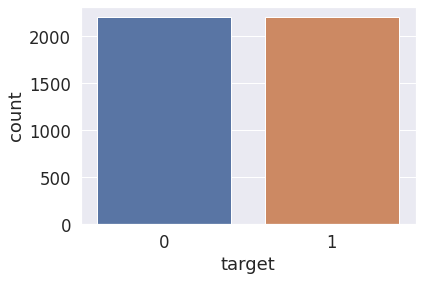

In [278]:
sns.countplot(final_df['target']);

[2203, 2203]


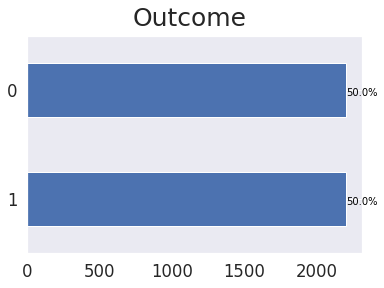

In [279]:
ax = final_df[ 'target'].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
print(totals)
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle('Outcome', fontsize=25)
plt.show()

Text(0.5, 1.0, 'without mask')

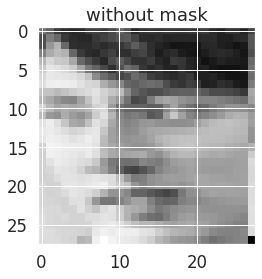

In [326]:
random_image = df_0.iloc[3, 1:]
random_image.shape
random_image = random_image.values.reshape(28,28)

plt.imshow(random_image, cmap='gray')
plt.title("without mask")

Text(0.5, 1.0, 'with mask')

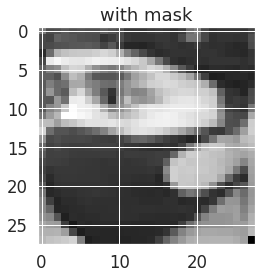

In [281]:
random_image = df_1.iloc[3, 1:]
random_image.shape
random_image = random_image.values.reshape(28,28)

plt.imshow(random_image, cmap='gray')
plt.title("with mask")

Spliting the dataset

In [282]:
X = final_df.iloc[:,:-1]
y= final_df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,shuffle= True)

Normaising the data

In [283]:
std = StandardScaler()
X = std.fit_transform(X)
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,-0.989915,-0.919399,-0.818706,-0.728731,-0.791248,-1.019133,-1.111607,-1.071305,-1.051485,-1.178982,-1.168053,-0.821295,-1.017305,-1.122287,-1.110360,-1.232247,-1.240170,-1.227835,-1.221071,-0.855698,-0.944126,-1.154282,-1.128824,-1.117816,-1.078744,-1.044837,-1.017131,-0.993124,-0.905281,-0.857440,-0.753911,-0.672234,-0.706198,-1.080076,-1.202115,-1.208533,-1.228907,-1.325200,-1.345687,-0.878594,...,1.178015,1.092802,1.181808,1.200683,1.055206,0.877174,0.731309,0.887366,0.814654,0.185341,-0.467535,-0.476537,-1.225753,-1.240417,-1.124558,-0.964761,-0.891311,0.057671,0.599737,0.831105,1.274137,1.143707,1.041703,1.189112,1.284007,1.112364,1.246765,1.218117,1.182973,1.288806,1.245843,1.078032,0.889042,0.809021,0.897185,0.763106,-0.062243,-0.562113,-0.264869,-0.157130
1,-0.030958,0.220577,-0.004831,-0.261813,-0.400600,-0.563594,-0.720749,-0.776508,-0.830925,-0.864409,-0.941581,-1.029835,-1.049202,-1.027363,-1.062837,-1.057281,-1.015250,-1.064466,-1.004181,-0.958711,-0.997176,-0.880485,-0.848976,-0.759885,-0.758661,-0.734903,-0.670974,-0.507156,0.758114,0.416737,0.126334,-0.029863,-0.294507,-0.370198,-0.567171,-0.724541,-0.757685,-0.831367,-0.920202,-1.044351,...,-0.248607,-0.132620,-0.142948,-0.444677,-1.058469,-1.200059,-1.373372,-1.308643,-1.104906,-0.909294,-0.293670,1.578853,-0.078242,-0.145277,-0.060882,0.177326,0.172702,-0.071401,-0.032324,-0.087565,-0.066839,-0.021831,-0.105848,-0.109445,-0.387051,-0.559234,-0.357510,-0.209624,-0.180414,-0.326434,-0.877406,-1.326329,-1.380994,-1.466144,-1.289101,-1.214660,-1.026366,-0.874876,-0.650721,1.231959
2,-1.006168,-0.902126,-0.674017,-0.299167,-0.251781,-0.235606,0.540658,1.148343,1.442548,1.486610,1.468726,1.488682,1.518444,1.535593,1.582596,1.630845,1.683790,1.696474,1.748663,1.839784,1.885202,1.857477,1.725620,1.123965,0.163930,-0.260888,-0.342126,-0.604350,-0.922429,-0.767709,-0.442158,-0.213398,-0.133410,0.582077,1.036898,1.163026,1.205742,1.205692,1.176835,1.185825,...,0.801763,1.029960,1.150266,1.090992,0.900923,0.312045,-1.328591,-1.597591,-1.287054,-0.348294,0.013936,0.063662,-1.173594,-1.332778,-1.447699,-1.405084,-0.611308,-0.602031,-0.355704,-0.464069,-0.544657,-0.100584,0.324484,0.403565,0.464546,0.180127,0.284200,0.833108,0.958415,0.825024,0.627882,0.418011,0.329307,-0.131380,-1.451596,-1.501293,-1.529387,-1.391614,-0.584195,-0.183340
3,0.732957,0.842383,0.157943,0.242458,0.399299,0.201711,0.185332,0.090542,0.034352,0.162093,-0.019518,-0.147552,-0.475070,-0.521100,-0.540087,-0.436944,-0.388687,-0.427326,-0.486980,-0.306301,0.523588,0.908317,0.027879,-0.270084,-0.193809,-0.169731,-0.220971,-0.345167,-0.047861,0.075760,-0.002035,0.465681,0.278281,0.114597,-0.065899,-0.192150,-0.302170,-0.723341,-0.646675,-0.441601,...,-1.424395,-1.248067,-0.631845,-0.005915,0.360933,0.556425,0.641748,0.641759,0.604484,0.595829,0.535529,0.472105,0.808471,0.817919,0.962400,1.016691,1.096713,1.219320,0.114667,-1.247197,-1.207438,-1.250371,-1.301215,-1.359907,-1.383259,-1.362887,-1.368204,-1.316524,-0.982406,-0.406396,0.057457,0.418011,0.718012,0.778685,0.779008,0.777438,0.776124,0.743331,0.666496,0.511205
4,0.180338,-0.021236,-0.185692,-0.280490,-0.307588,-0.508930,-0.756281,-0.897895,-1.000587,-1.029973,-0.844522,-0.709005,-0.682395,-0.489458,-0.254950,-0.389226,-0.533279,-0.737727,-0.904077,-0.958711,-0.997176,-0.898738,-0.718381,-0.778723,-0.645691,1.817490,2.150200,-0.523355,0.106475,-0.121648,-0.167081,-0.323518,-0.777796,-0.976191,-1.051734,-1.014936,-0.632026,-0.028889,0.477823,0.688556,...,-1.283300,-1.248067,-1.168056,-1.102821,-0.981328,-0.925131,-0.880787,-0.860773,-0.838689,-0.922977,-0.133180,0.208593,-0.469439,1.095003,0.908543,0.727729,0.676708,0.674349,0.732029,0.816045,0.857972,0.718443,0.659186,-0.365

In [284]:
def plot_roc_curve(y_test, y_pred):
    ''' Plot the ROC curve for the target labels and predictions'''
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    roc_auc= metrics.auc(fpr,tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend()
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [285]:
def plot_confussion_matrix(y_test, y_pred):
    c_matrix = metrics.confusion_matrix(y_test, y_pred)

    # Create a dataframe with the confussion matrix values
    df_c_matrix = pd.DataFrame(c_matrix, range(c_matrix.shape[0]),
                  range(c_matrix.shape[1]))
    # Plot the confussion matrix
    sns.set(font_scale=1.5) #for label size
    sns.heatmap(df_c_matrix, annot=True,fmt='.0f',annot_kws={"size": 10})# font size
    plt.show()

Without Feature Selection

In [286]:
SVM_model = svm.SVC()
SVM_model.fit(X_train,y_train)
y_predict_SVM = SVM_model.predict(X_test)
print("Train score of support vector machine",SVM_model.score(X_train,y_train),"%")
print("Accuracy of support vector machine :",metrics.accuracy_score(y_test, y_predict_SVM),"%")


Train score of support vector machine 0.9623241034952338 %
Accuracy of support vector machine : 0.9105764866091693 %


In [287]:
cv_score_SVM = cross_val_score(SVM_model, X_train, y_train, cv=5, scoring='accuracy')
cv_score_SVM

array([0.90249433, 0.92063492, 0.90249433, 0.91590909, 0.87954545])

In [288]:
print("The accuracy using 5-fold cross validation is %.5f with std deviation of %.5f" %(np.mean(cv_score_SVM),np.std(cv_score_SVM)))

The accuracy using 5-fold cross validation is 0.90422 with std deviation of 0.01429


In [289]:
print(metrics.classification_report(y_test, y_predict_SVM))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1102
           1       0.92      0.89      0.91      1101

    accuracy                           0.91      2203
   macro avg       0.91      0.91      0.91      2203
weighted avg       0.91      0.91      0.91      2203



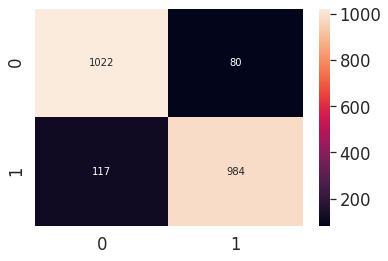

In [290]:
plot_confussion_matrix(y_test,y_predict_SVM)

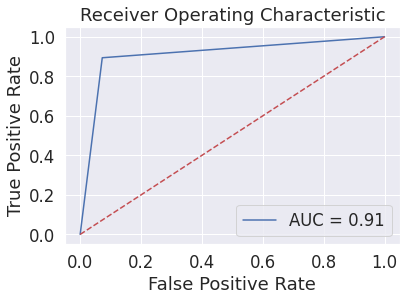

In [291]:
plot_roc_curve(y_test, y_predict_SVM)

Random Forest

In [292]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_predict_rf = rf_model.predict(X_test)
print("Train score of random forest",rf_model.score(X_train,y_train),"%")
print("Accuracy of random forest :",metrics.accuracy_score(y_test, y_predict_rf),"%")

Train score of random forest 1.0 %
Accuracy of random forest : 0.902859736722651 %


In [293]:
cv_score_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
cv_score_rf

array([0.87528345, 0.92063492, 0.86394558, 0.88636364, 0.88863636])

In [294]:
print("The accuracy using 5-fold cross validation is %.5f with std deviation of %.5f" %(np.mean(cv_score_rf),np.std(cv_score_rf)))

The accuracy using 5-fold cross validation is 0.88697 with std deviation of 0.01899


In [295]:
print(metrics.classification_report(y_test, y_predict_rf))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1102
           1       0.94      0.86      0.90      1101

    accuracy                           0.90      2203
   macro avg       0.91      0.90      0.90      2203
weighted avg       0.91      0.90      0.90      2203



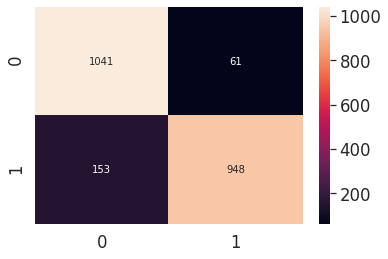

In [296]:
plot_confussion_matrix(y_test,y_predict_rf)

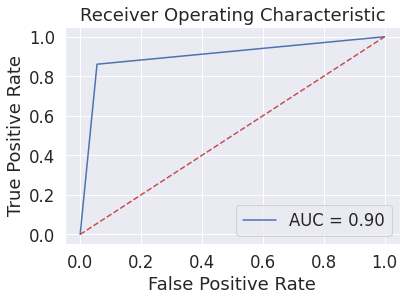

In [297]:
plot_roc_curve(y_test,y_predict_rf)

KNN

In [298]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)
print("Train score of knn classifier",knn_model.score(X_train,y_train),"%")
knn_y_pred=knn_model.predict(X_test)
print("Accuracy of knn classifier :",metrics.accuracy_score(y_test, knn_y_pred),"%")


Train score of knn classifier 0.899682251475261 %
Accuracy of knn classifier : 0.8520199727644122 %


In [299]:
cv_score_knn = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
cv_score_knn

array([0.83446712, 0.83900227, 0.85714286, 0.85227273, 0.80681818])

In [300]:
print("The accuracy using 5-fold cross validation is %.5f with std deviation of %.5f" %(np.mean(cv_score_knn),np.std(cv_score_knn)))

The accuracy using 5-fold cross validation is 0.83794 with std deviation of 0.01764


In [301]:
print(metrics.classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.87      1102
           1       0.94      0.75      0.84      1101

    accuracy                           0.85      2203
   macro avg       0.87      0.85      0.85      2203
weighted avg       0.87      0.85      0.85      2203



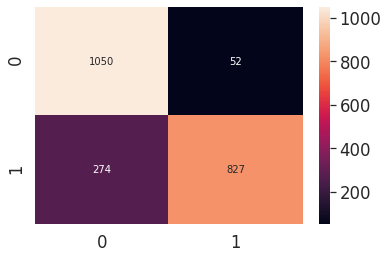

In [302]:
plot_confussion_matrix(y_test,knn_y_pred)

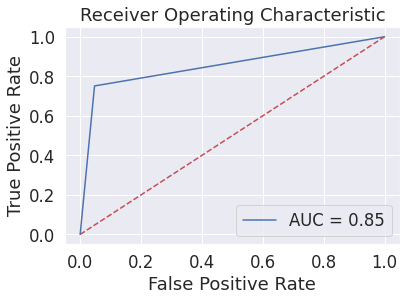

In [303]:
plot_roc_curve(y_test, knn_y_pred)

Recursive Feature Elimination

In [304]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,-0.989915,-0.919399,-0.818706,-0.728731,-0.791248,-1.019133,-1.111607,-1.071305,-1.051485,-1.178982,-1.168053,-0.821295,-1.017305,-1.122287,-1.110360,-1.232247,-1.240170,-1.227835,-1.221071,-0.855698,-0.944126,-1.154282,-1.128824,-1.117816,-1.078744,-1.044837,-1.017131,-0.993124,-0.905281,-0.857440,-0.753911,-0.672234,-0.706198,-1.080076,-1.202115,-1.208533,-1.228907,-1.325200,-1.345687,-0.878594,...,1.178015,1.092802,1.181808,1.200683,1.055206,0.877174,0.731309,0.887366,0.814654,0.185341,-0.467535,-0.476537,-1.225753,-1.240417,-1.124558,-0.964761,-0.891311,0.057671,0.599737,0.831105,1.274137,1.143707,1.041703,1.189112,1.284007,1.112364,1.246765,1.218117,1.182973,1.288806,1.245843,1.078032,0.889042,0.809021,0.897185,0.763106,-0.062243,-0.562113,-0.264869,-0.157130
1,-0.030958,0.220577,-0.004831,-0.261813,-0.400600,-0.563594,-0.720749,-0.776508,-0.830925,-0.864409,-0.941581,-1.029835,-1.049202,-1.027363,-1.062837,-1.057281,-1.015250,-1.064466,-1.004181,-0.958711,-0.997176,-0.880485,-0.848976,-0.759885,-0.758661,-0.734903,-0.670974,-0.507156,0.758114,0.416737,0.126334,-0.029863,-0.294507,-0.370198,-0.567171,-0.724541,-0.757685,-0.831367,-0.920202,-1.044351,...,-0.248607,-0.132620,-0.142948,-0.444677,-1.058469,-1.200059,-1.373372,-1.308643,-1.104906,-0.909294,-0.293670,1.578853,-0.078242,-0.145277,-0.060882,0.177326,0.172702,-0.071401,-0.032324,-0.087565,-0.066839,-0.021831,-0.105848,-0.109445,-0.387051,-0.559234,-0.357510,-0.209624,-0.180414,-0.326434,-0.877406,-1.326329,-1.380994,-1.466144,-1.289101,-1.214660,-1.026366,-0.874876,-0.650721,1.231959
2,-1.006168,-0.902126,-0.674017,-0.299167,-0.251781,-0.235606,0.540658,1.148343,1.442548,1.486610,1.468726,1.488682,1.518444,1.535593,1.582596,1.630845,1.683790,1.696474,1.748663,1.839784,1.885202,1.857477,1.725620,1.123965,0.163930,-0.260888,-0.342126,-0.604350,-0.922429,-0.767709,-0.442158,-0.213398,-0.133410,0.582077,1.036898,1.163026,1.205742,1.205692,1.176835,1.185825,...,0.801763,1.029960,1.150266,1.090992,0.900923,0.312045,-1.328591,-1.597591,-1.287054,-0.348294,0.013936,0.063662,-1.173594,-1.332778,-1.447699,-1.405084,-0.611308,-0.602031,-0.355704,-0.464069,-0.544657,-0.100584,0.324484,0.403565,0.464546,0.180127,0.284200,0.833108,0.958415,0.825024,0.627882,0.418011,0.329307,-0.131380,-1.451596,-1.501293,-1.529387,-1.391614,-0.584195,-0.183340
3,0.732957,0.842383,0.157943,0.242458,0.399299,0.201711,0.185332,0.090542,0.034352,0.162093,-0.019518,-0.147552,-0.475070,-0.521100,-0.540087,-0.436944,-0.388687,-0.427326,-0.486980,-0.306301,0.523588,0.908317,0.027879,-0.270084,-0.193809,-0.169731,-0.220971,-0.345167,-0.047861,0.075760,-0.002035,0.465681,0.278281,0.114597,-0.065899,-0.192150,-0.302170,-0.723341,-0.646675,-0.441601,...,-1.424395,-1.248067,-0.631845,-0.005915,0.360933,0.556425,0.641748,0.641759,0.604484,0.595829,0.535529,0.472105,0.808471,0.817919,0.962400,1.016691,1.096713,1.219320,0.114667,-1.247197,-1.207438,-1.250371,-1.301215,-1.359907,-1.383259,-1.362887,-1.368204,-1.316524,-0.982406,-0.406396,0.057457,0.418011,0.718012,0.778685,0.779008,0.777438,0.776124,0.743331,0.666496,0.511205
4,0.180338,-0.021236,-0.185692,-0.280490,-0.307588,-0.508930,-0.756281,-0.897895,-1.000587,-1.029973,-0.844522,-0.709005,-0.682395,-0.489458,-0.254950,-0.389226,-0.533279,-0.737727,-0.904077,-0.958711,-0.997176,-0.898738,-0.718381,-0.778723,-0.645691,1.817490,2.150200,-0.523355,0.106475,-0.121648,-0.167081,-0.323518,-0.777796,-0.976191,-1.051734,-1.014936,-0.632026,-0.028889,0.477823,0.688556,...,-1.283300,-1.248067,-1.168056,-1.102821,-0.981328,-0.925131,-0.880787,-0.860773,-0.838689,-0.922977,-0.133180,0.208593,-0.469439,1.095003,0.908543,0.727729,0.676708,0.674349,0.732029,0.816045,0.857972,0.718443,0.659186,-0.365

In [305]:
rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=100, step=10, verbose=5)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print('selected features : ',rfe_feature)

X_rfe = X[rfe_feature]
X_rfe

Fitting estimator with 784 features.
Fitting estimator with 774 features.
Fitting estimator with 764 features.
Fitting estimator with 754 features.
Fitting estimator with 744 features.
Fitting estimator with 734 features.
Fitting estimator with 724 features.
Fitting estimator with 714 features.
Fitting estimator with 704 features.
Fitting estimator with 694 features.
Fitting estimator with 684 features.
Fitting estimator with 674 features.
Fitting estimator with 664 features.
Fitting estimator with 654 features.
Fitting estimator with 644 features.
Fitting estimator with 634 features.
Fitting estimator with 624 features.
Fitting estimator with 614 features.
Fitting estimator with 604 features.
Fitting estimator with 594 features.
Fitting estimator with 584 features.
Fitting estimator with 574 features.
Fitting estimator with 564 features.
Fitting estimator with 554 features.
Fitting estimator with 544 features.
Fitting estimator with 534 features.
Fitting estimator with 524 features.
F

,3,5,6,7,8,9,10,11,12,15,17,20,24,179,180,181,182,183,184,185,204,207,208,209,210,211,212,213,214,216,293,297,326,327,328,406,407,426,427,428,...,573,574,575,576,578,596,597,598,599,600,601,602,603,604,605,606,626,627,628,629,630,631,632,633,658,683,684,685,686,687,688,689,690,711,712,713,714,715,716,717
0,-0.728731,-1.019133,-1.111607,-1.071305,-1.051485,-1.178982,-1.168053,-0.821295,-1.017305,-1.232247,-1.227835,-0.944126,-1.078744,-1.377044,-1.198611,-1.026996,-0.485165,-1.706225,-1.683467,-1.733161,-1.330022,-1.343970,-1.419881,-1.525787,-1.166226,-2.130475,-1.876162,-1.820601,-1.691850,-1.305715,-0.536959,-1.514008,-1.074101,-1.859173,-1.354166,0.888993,0.963120,0.639435,0.287371,0.224219,...,1.000542,0.913366,0.742036,1.049347,1.129503,0.348580,0.540873,0.626294,0.788908,0.949646,0.910144,0.944593,1.214175,1.220764,1.196982,1.160814,0.517604,1.035018,1.118587,1.208930,1.106033,1.058519,1.058946,1.134280,0.916144,0.442804,0.716763,0.911937,0.953701,0.903240,0.921382,0.975527,0.935063,0.713290,0.732872,0.901013,1.109522,1.134666,1.107169,1.002008
1,-0.261813,-0.563594,-0.720749,-0.776508,-0.830925,-0.864409,-0.941581,-1.029835,-1.049202,-1.057281,-1.064466,-0.997176,-0.758661,-1.489953,-1.588704,-1.569287,-1.540120,-1.673299,-1.601732,-1.440843,-1.346669,-1.668880,-1.797459,-1.802046,-1.790321,-1.715439,-1.584005,-1.479396,-1.337351,-1.339094,-2.164758,-1.187112,-0.767414,-0.825507,-0.823201,-1.804150,-1.845486,-0.822091,-0.754589,-0.745521,...,-0.245874,-0.049621,0.010488,0.069847,-0.725106,-0.604196,-0.626902,-0.729839,-0.563224,-0.376839,-0.148277,0.014298,0.287467,0.389596,0.014272,-1.050344,-0.444057,-0.299857,-0.078110,0.152199,-0.199854,0.284937,0.244170,-0.800195,0.039774,-0.883375,-0.724950,-0.647754,-0.342960,0.294946,0.297028,-0.262527,-0.909601,-0.538028,-0.404031,-0.150804,-0.133829,-0.129074,-0.099891,-0.395135
2,-0.299167,-0.235606,0.540658,1.148343,1.442548,1.486610,1.468726,1.488682,1.518444,1.630845,1.696474,1.885202,0.163930,0.703700,0.654331,0.567012,0.569790,0.565658,0.572405,0.605389,-0.680765,-0.266638,0.210567,0.356230,0.376673,0.411617,0.409540,0.448410,0.536431,0.546812,-0.460357,0.447369,0.080486,-0.308674,-1.053286,-0.019736,0.601779,0.477043,0.447673,0.430885,...,0.538907,0.653512,0.894442,1.049347,1.068194,-0.010663,0.073763,0.189837,0.136154,0.122543,0.240848,0.448436,0.627260,0.682044,0.644027,0.608024,0.626179,0.336537,0.123930,0.214360,0.453089,0.640785,0.705364,0.627632,0.547146,0.041866,0.440690,0.437913,0.404527,0.340568,0.312256,0.287719,0.350919,-0.599822,-0.357940,0.382726,0.487847,0.525635,0.557117,0.618178
3,0.242458,0.201711,0.185332,0.090542,0.034352,0.162093,-0.019518,-0.147552,-0.475070,-0.436944,-0.427326,0.523588,-0.193809,-1.038318,-0.629725,-0.057445,0.190666,0.499806,0.801261,0.832748,-0.414403,-0.557346,-0.218498,0.045438,0.342001,0.705600,0.804812,0.943157,0.941573,0.797153,0.707828,1.504973,1.577841,1.491330,1.389154,-1.159778,-1.287050,-1.682767,-1.652279,-1.603979,...,-1.507678,-1.501743,-1.498330,-1.552449,-0.020048,-1.353921,-1.343138,-1.337761,-1.371395,-1.391211,-1.424609,-1.443165,-1.457834,-1.426659,-1.490995,-1.388159,-1.359186,-1.370861,-1.368055,-1.370737,-1.396917,-1.416945,-1.400756,-1.383608,-1.374719,-1.453941,-1.461143,-1.458182,-1.471819,-1.484316,-1.499892,-1.500581,-1.478372,-1.511276,-1.525571,-1.537983,-1.528809,-1.529845,-1.505581,-1.485213
4,-0.280490,-0.508930,-0.756281,-0.897895,-1.000587,-1.029973,-0.844522,-0.709005,-0.682395,-0.389226,-0.737727,-0.997176,-0.645691,1.155334,1.174455,1.175035,1.163202,1.092471,1.062811,1.043867,1.433482,1.255308,1.223162,1.219541,1.208799,1.155222,1.131340,1.130819,1.161025,1.114252,0.401419,-0.783299,1.235073,1.027962,0.716598,-0.465839,0.059767,0.152260,0.591945,0.621654,...,-1.138369,-1.134891,-1.132556,-1.139223,-1.184927,0.551630,0.416310,0.330127,-1.122727,-1.188336,-1.128874,-1.164077,-1.148931,-1.134211,-1.168438,-1.203896,0.222902,-1.200121,-1.243723,-1.184255,-1.210361,-1.231285,-1.231651,-1.245431,-1

In [306]:
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y, test_size = 0.5)

SVM After feature Selection

In [307]:
SVM_model_rfe = svm.SVC()
SVM_model_rfe.fit(X_train_rfe,y_train_rfe)
y_predict_SVM_rfe = SVM_model_rfe.predict(X_test_rfe)
print("Train score of support vector machine after applying feature selections : ",SVM_model_rfe.score(X_train_rfe,y_train_rfe),"%")
print("Accuracy of support vector machine after applying feature selections : ",metrics.accuracy_score(y_test_rfe, y_predict_SVM_rfe),"%")

Train score of support vector machine after applying feature selections :  0.935088515660463 %
Accuracy of support vector machine after applying feature selections :  0.911484339536995 %


In [308]:
cv_score_SVM_rfe = cross_val_score(SVM_model_rfe, X_train_rfe, y_train_rfe, cv=5, scoring='accuracy')
cv_score_SVM_rfe

array([0.90702948, 0.90702948, 0.91156463, 0.93636364, 0.88181818])

In [309]:
print("The accuracy using 5-fold cross validation is %.5f with std deviation of %.5f" %(np.mean(cv_score_SVM_rfe),np.std(cv_score_SVM_rfe)))

The accuracy using 5-fold cross validation is 0.90876 with std deviation of 0.01733


In [310]:
print(metrics.classification_report(y_test_rfe, y_predict_SVM_rfe))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1097
           1       0.92      0.90      0.91      1106

    accuracy                           0.91      2203
   macro avg       0.91      0.91      0.91      2203
weighted avg       0.91      0.91      0.91      2203



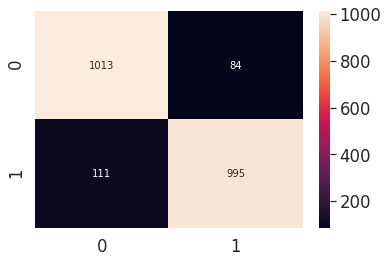

In [311]:
plot_confussion_matrix(y_test_rfe,y_predict_SVM_rfe)

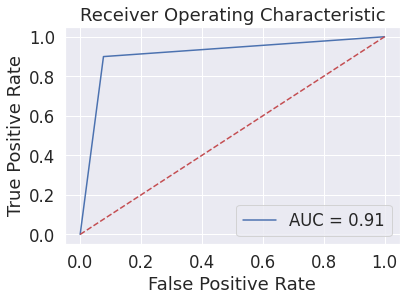

In [312]:
plot_roc_curve(y_test_rfe, y_predict_SVM_rfe)

Random Forest After Feature Selection

In [313]:
rf_model_rfe = RandomForestClassifier()
rf_model_rfe.fit(X_train_rfe, y_train_rfe)
y_predict_rf_rfe = rf_model_rfe.predict(X_test_rfe)
print("Train score of random forest after applying feature selections : ",rf_model_rfe.score(X_train_rfe,y_train_rfe),"%")
print("Accuracy of random forest after applying feature selections  :",metrics.accuracy_score(y_test_rfe, y_predict_rf_rfe),"%")

Train score of random forest after applying feature selections :  1.0 %
Accuracy of random forest after applying feature selections  : 0.9051293690422152 %


In [314]:
cv_score_rf_rfe = cross_val_score(rf_model_rfe, X_train_rfe, y_train_rfe, cv=5, scoring='accuracy')
cv_score_rf_rfe

array([0.89795918, 0.90022676, 0.90702948, 0.93181818, 0.87272727])

In [315]:
print("The accuracy using 5-fold cross validation is %.5f with std deviation of %.5f" %(np.mean(cv_score_rf_rfe),np.std(cv_score_rf_rfe)))

The accuracy using 5-fold cross validation is 0.90195 with std deviation of 0.01892


In [316]:
print(metrics.classification_report(y_test_rfe, y_predict_rf_rfe))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1097
           1       0.92      0.88      0.90      1106

    accuracy                           0.91      2203
   macro avg       0.91      0.91      0.91      2203
weighted avg       0.91      0.91      0.91      2203



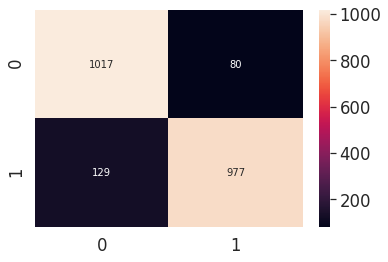

In [317]:
plot_confussion_matrix(y_test_rfe,y_predict_rf_rfe)

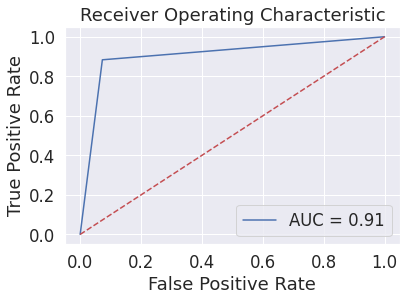

In [318]:
plot_roc_curve(y_test_rfe,y_predict_rf_rfe)

KNN After Feature Selection

In [319]:
knn_model_rfe = KNeighborsClassifier()
knn_model_rfe.fit(X_train_rfe,y_train_rfe)
print("Train score of knn classifier after applying feature selections : ",knn_model_rfe.score(X_train_rfe,y_train_rfe),"%")
knn_y_pred_rfe=knn_model_rfe.predict(X_test_rfe)
print("Accuracy of knn classifier after applying feature selections  :",metrics.accuracy_score(y_test_rfe, knn_y_pred_rfe),"%")


Train score of knn classifier after applying feature selections :  0.9255560599182933 %
Accuracy of knn classifier after applying feature selections  : 0.8942351339083069 %


In [320]:
cv_score_knn_rfe = cross_val_score(knn_model_rfe, X_train_rfe, y_train_rfe, cv=5, scoring='accuracy')
cv_score_knn_rfe

array([0.87528345, 0.88435374, 0.88662132, 0.90909091, 0.88863636])

In [321]:
print("The accuracy using 5-fold cross validation is %.5f with std deviation of %.5f" %(np.mean(cv_score_knn_rfe),np.std(cv_score_knn_rfe)))

The accuracy using 5-fold cross validation is 0.88880 with std deviation of 0.01113


In [322]:
print(metrics.classification_report(y_test_rfe, knn_y_pred_rfe))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1097
           1       0.91      0.87      0.89      1106

    accuracy                           0.89      2203
   macro avg       0.89      0.89      0.89      2203
weighted avg       0.89      0.89      0.89      2203



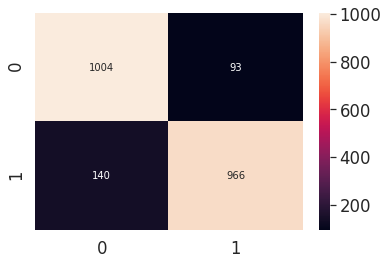

In [323]:
plot_confussion_matrix(y_test_rfe,knn_y_pred_rfe)

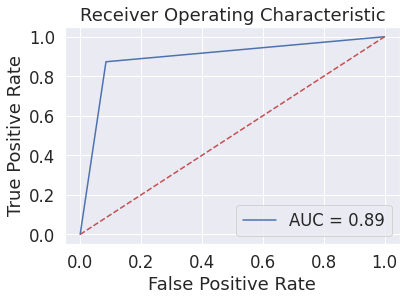

In [324]:
plot_roc_curve(y_test_rfe, knn_y_pred_rfe)